In [49]:
## Data Analysis Phase
## I aim to understand more about the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, classification_report, plot_confusion_matrix, roc_curve, auc
import plotly.offline as pyo
import plotly. graph_objs as go
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

ModuleNotFoundError: No module named 'xgboost'

In [8]:
pip install yourFile.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: yourFile.whl is not a valid wheel filename.


In [2]:
pip install xgboost

  Using cached xgboost-1.4.2.tar.gz (716 kB)
Using legacy 'setup.py install' for xgboost, since package 'wheel' is not installed.
    Running setup.py install for xgboost: started
    Running setup.py install for xgboost: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\user\appdata\local\programs\python\python38-32\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-yk404avi\\xgboost_2f60bd5137a04489bb170962b3cbddac\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-yk404avi\\xgboost_2f60bd5137a04489bb170962b3cbddac\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\USER\AppData\Local\Temp\pip-record-g30e64bi\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\user\appdata\local\programs\python\python38-32\Include\xgboost'
         cwd: C:\Users\USER\AppData\Local\Temp\pip-install-yk

    copying xgboost\src\tree\updater_colmaker.cc -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_gpu_common.cuh -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_gpu_hist.cu -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_histmaker.cc -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_prune.cc -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_quantile_hist.cc -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_quantile_hist.h -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_refresh.cc -> build\lib.win32-3.8\xgboost\src\tree
    copying xgboost\src\tree\updater_sync.cc -> build\lib.win32-3.8\xgboost\src\tree
    creating build\lib.win32-3.8\xgboost\src\tree\gpu_hist
    copying xgboost\src\tree\gpu_hist\driver.cuh -> build\lib.win32-3.8\xgboost\src\tree\gpu_hist
    copying xgboost\src\tree\gpu_hist

In [2]:
data = pd.read_csv('creditcard.csv')
## print shape of dataset with rows and columns
print(data.shape)
#Here we have 284807 observations/cases and 31features

(284807, 31)


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.info()
#Here we have 30 Floats(decimals) and 1 integers as features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()
#There is no missing obsevation

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()
#the statistics of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.dtypes
#the data types of each feature

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
amount = data[['Amount','Class']]
amount.describe()


,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


In [10]:
#there is certainly outliers  in the the amount column where mean amount is 22 and the max amount is 25691

<AxesSubplot:>

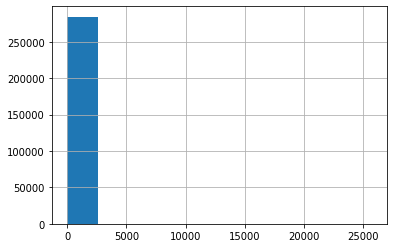

In [11]:
data.Amount.hist()

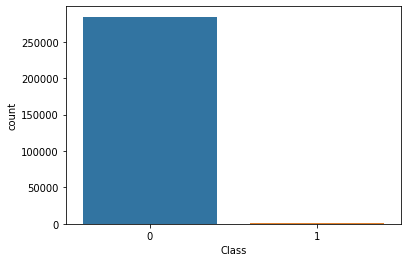

In [13]:
import seaborn as sns
sns.countplot(data['Class'],label="Count")
plt.show()
#The class is inbalance, so there is need to resample

In [14]:
fraud = round(len(data[data['Class']==1])/len(data) *100,2)
not_fraud = round(len(data[data['Class']==0])/len(data) *100,2)
print("Number of fraud transaction is:", str(not_fraud)+'%' ,"of the dataset")
print("fraud transaction is:", str(fraud)+'%' ,"of the dataset")

Number of fraud transaction is: 99.83% of the dataset
fraud transaction is: 0.17% of the dataset


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


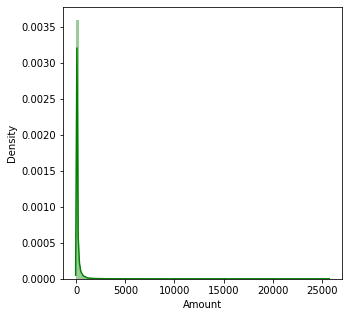

In [15]:
print(data['Amount'].describe())
plt.figure(figsize=(5, 5))
sns.distplot(data['Amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0.5, 1.0, 'Distribution of Transaction time')

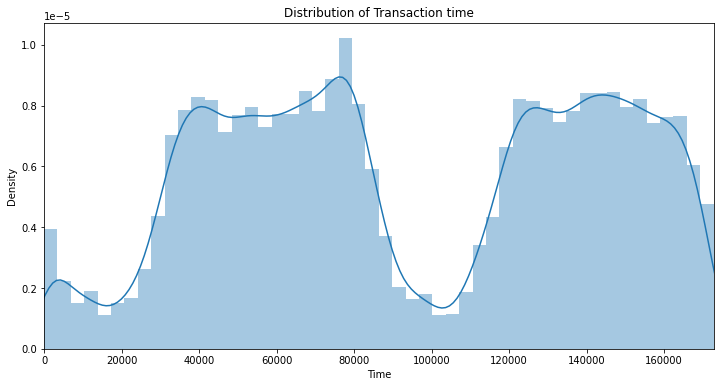

In [16]:
#Time distribution of the time column
time_val = data['Time'].values
plt.figure(figsize = (12,6))
sns.distplot(data['Time'])
plt.xlim(min(time_val),max(time_val))
plt.title('Distribution of Transaction time')

In [17]:
#Numerical data

df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


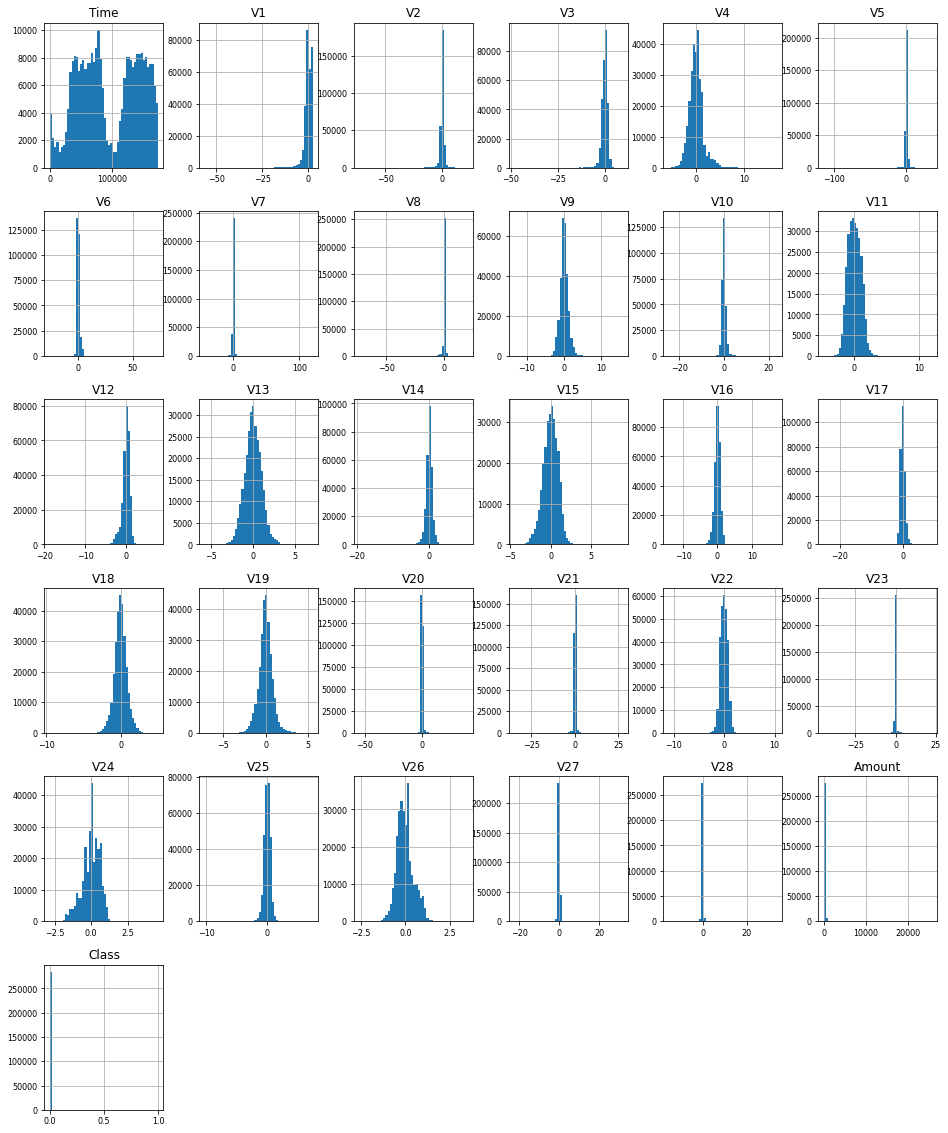

In [18]:
#Numerical data distribution
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

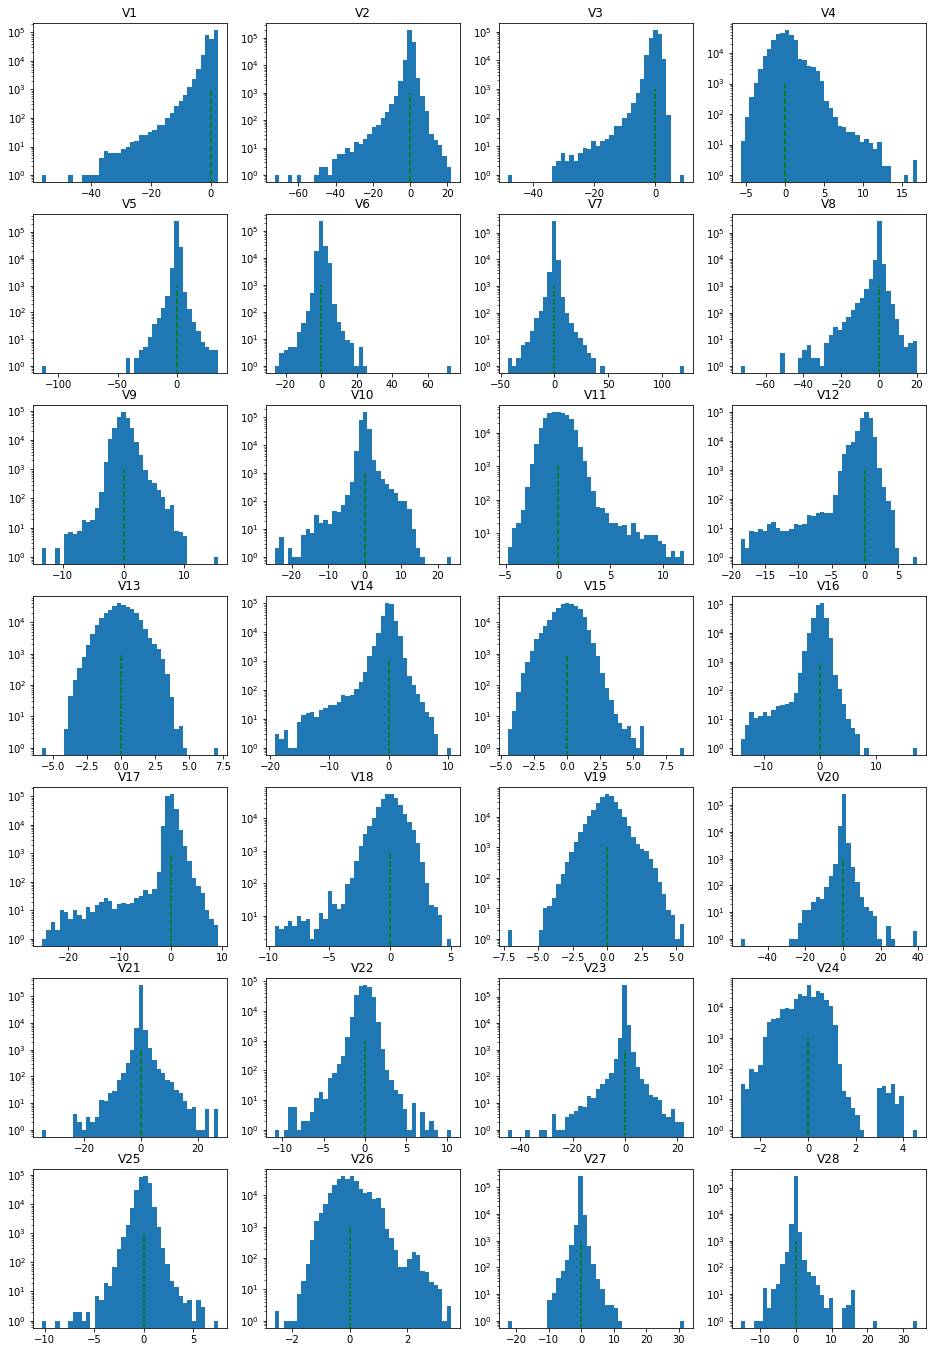

In [19]:
# DISTRIBUTION OF V'S
fig, ax = plt.subplots(nrows = 7,ncols = 4,figsize=(16,24))

for i in range(1,29):
    m = (i-1)//4
    n = (i-1)%4
    col = 'V' + str(i)
    ax[m,n].hist(data[col],bins=40)
    ax[m,n].set_title(col)
    ax[m,n].vlines(x = data[col].mean(),ymin =0,ymax = 10**3,linestyle = 'dashed',colors = 'g')
    ax[m,n].set_yscale('log')

Text(0.5, 1.0, 'Amount vs Class')

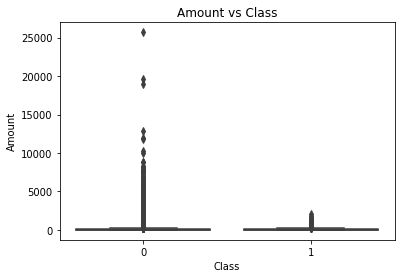

In [30]:
#BIVARIATE ANALYSIS
#CLASS VS AMOUNT
sns.boxplot(x='Class',y='Amount',data=data)
plt.title('Amount vs Class')
#There are very less points having Amount > 10,000 which are outliers
#Therefore these values should be excluded from dataset

In [20]:
amount_greater=data[data['Amount']>10000]
amount_greater

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [21]:
amount_greater.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,98725.000000,-26.049871,-40.741976,-20.864230,11.805415,-33.109306,18.189470,37.068496,-7.482068,-1.918086,-7.647657,1.628313,-1.570637,2.764840,1.703751,2.940036,4.195916,-0.720734,2.088963,-2.644370,14.216475,3.322516,-4.656946,-8.573422,1.066804,-2.951342,-0.525707,3.025844,-0.729222,15865.141429,0.0
std,55992.249068,10.146354,17.666546,12.619146,4.813855,36.909633,25.221533,38.237519,8.923287,1.709270,2.429227,2.367043,4.072845,2.277691,4.099402,2.729333,5.841683,2.931130,2.485638,4.704407,32.655586,11.679582,5.931179,8.591653,1.628423,4.613917,2.455225,12.833316,6.802202,5676.993755,0.0
min,42951.000000,-36.802320,-63.344698,-48.325589,3.592021,-113.743307,4.256017,14.785051,-27.347360,-4.210637,-12.005487,-0.083514,-9.189418,0.241005,-6.795942,0.801598,0.773133,-7.173805,-1.968044,-7.213527,-54.497720,-21.620120,-10.933144,-17.173665,-0.447084,-7.081325,-2.604551,-3.602479,-15.430084,10199.440000,0.0
25%,47327.000000,-35.048918,-51.318653,-20.993324,9.838905,-30.549895,5.910773,15.335583,-6.121172,-3.279868,-8.665793,0.463603,-3.390859,1.501463,1.446013,1.423646,1.601343,-0.508008,1.002849,-5.665359,13.051824,3.280381,-8.212888,-13.911762,0.375934,-5.936967,-2.387975,-2.954174,-0.355822,11843.965000,0.0
50%,95286.000000,-23.712839,-38.305310,-16.233798,10.473005,-19.229075,6.335259,24.422716,-4.730111,-1.580725,-7.776435,1.067549,0.832726,1.746979,2.788521,2.569520,2.326099,0.297532,1.340820,-3.838863,24.133894,7.437478,-6.320710,-10.547038,0.653249,-4.547278,-1.577118,-2.257913,2.082488,12910.930000,0.0
75%,142955.500000,-21.352781,-34.896968,-13.690553,16.009861,-13.413166,15.805920,34.505524,-2.831253,-0.632207,-5.539423,1.316527,1.131986,3.618044,3.526220,2.742050,2.877190,0.716871,4.101598,-0.814613,32.177300,9.688457,-2.315648,-5.754877,0.962521,-0.855770,0.931018,0.668726,2.752232,19283.265000,0.0
max,172273.000000,-9.030538,-11.112584,-12.122469,16.875344,-10.866639,73.301626,120.589494,-2.392155,0.188912,-5.341249,6.853897,1.879982,7.126883,5.989210,8.877742,17.315112,1.413407,5.041069,5.501747,39.420904,11.502580,5.712303,7.040028,4.584549,4.554683,3.415636,31.612198,3.450224,25691.160000,0.0


In [22]:
df = data[data['Amount']<10000]
df.describe()
#This caters for amount without ouliers ,this will be our new dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,0.000196,-0.000043,0.000028,-0.000071,-0.000056,-0.000083,-0.000105,0.000014,-0.000053,0.000080,-0.000419,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,1.088140,1.020636,0.998993,0.995138,0.958356,0.915110,0.875607,0.849232,0.838046,0.813619,0.752023,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-28.009635,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,-0.535402,-0.762503,-0.405566,-0.648553,-0.425594,-0.582892,-0.468069,-0.483748,-0.498850,-0.456268,-0.211725,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,-0.092884,-0.032767,0.140025,-0.013586,0.050568,0.048037,0.066370,-0.065678,-0.003659,0.003741,-0.062486,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,0.454005,0.739561,0.618202,0.662438,0.493112,0.648780,0.523268,0.399655,0.500757,0.458949,0.133017,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,4.295648,5.591971,23.643417,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

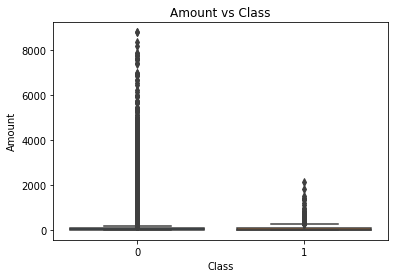

In [23]:
#BIVARIATE ANALYSIS
#CLASS VS AMOUNT
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
#we have dealt with outliers

In [24]:
#Amount and Time Distribution,this answers which hour of day or which minute of hour transaction is happening
data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')
#new variable for further analysis
data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
#new variable for further analysis
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [25]:
data_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,59,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,59,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,59,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,59,23


In [26]:
timedelta

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, Length: 284799, dtype: timedelta64[ns]

In [27]:
data_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,59,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,59,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,59,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,59,23


Text(0.5, 1.0, 'Amounts by Minutes of Frauds and Normal Transactions')

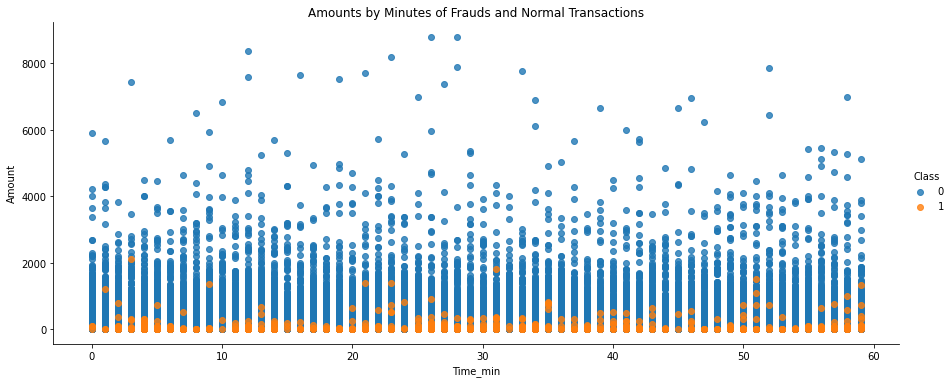

In [28]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)

Text(0.5, 1.0, 'Amounts by hour of Frauds and Normal Transactions in hours')

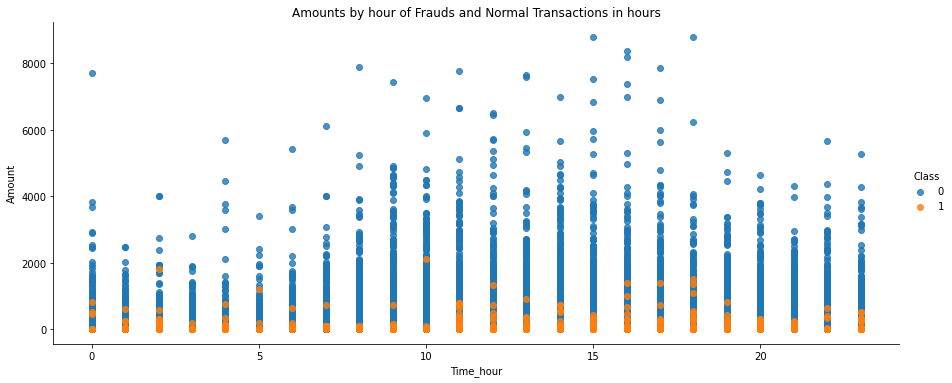

In [29]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by hour of Frauds and Normal Transactions in hours",fontsize=12)

(-1.0, 25.0)

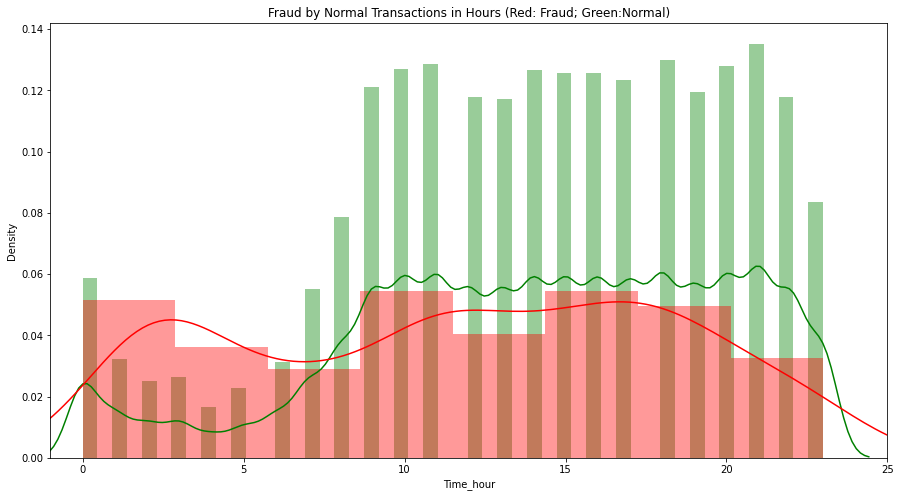

In [30]:
plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud by Normal Transactions in Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,25])

(-1.0, 60.0)

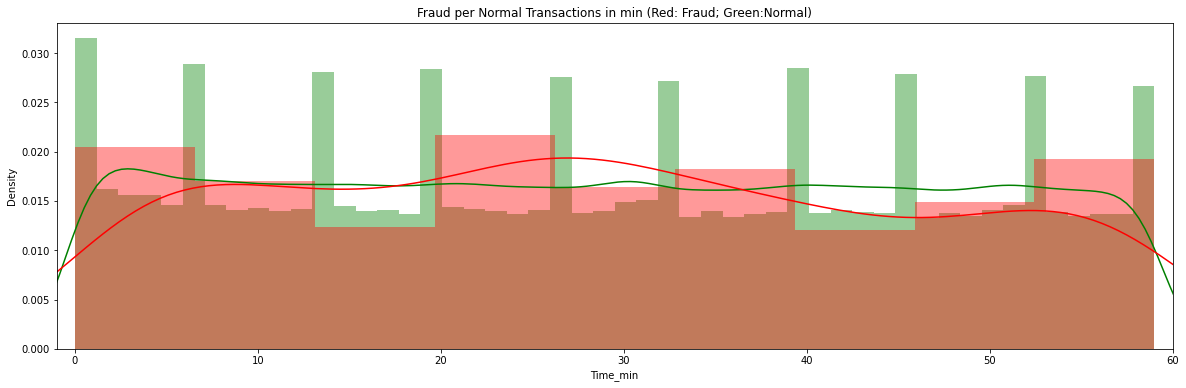

In [31]:
plt.figure(figsize=(20,6))
# Non-Fraudulent Transactions over Time (in min) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_min"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_min"],
             color='r')
plt.title('Fraud per Normal Transactions in min (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,60])
# in every minute approximate same % of fraud and non fraud transaction happens

In [32]:
Time_hour_fraud=data_new.loc[(data_new.Class ==1)]
Time_hour_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,6,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,7,0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,14,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,56,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,59,22
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,2,23
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,2,23
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,12,23


In [33]:
Time_hour_nofraud=data_new.loc[(data_new.Class ==0)]
Time_hour_nofraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,59,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,59,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,59,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,59,23


In [ ]:
#there is need to balance the class variable,is really biased

(-1.0, 25.0)

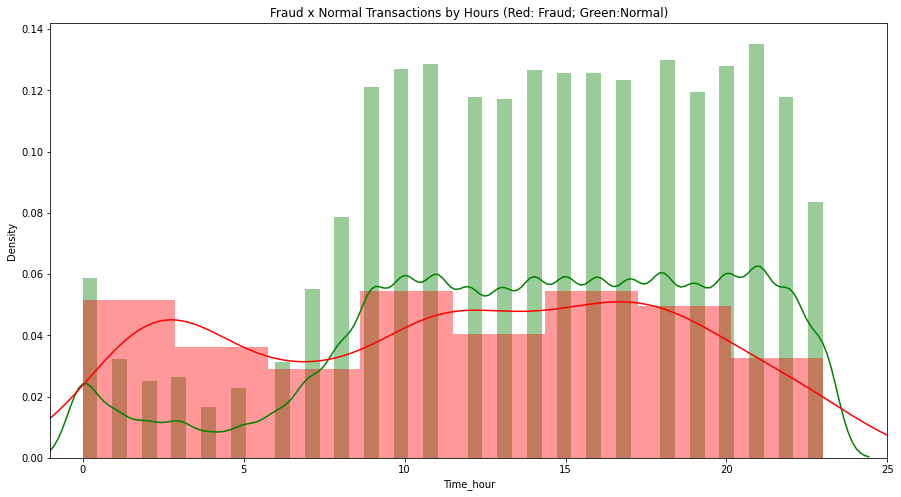

In [34]:
plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,25])

In [35]:
# correlation in the Numerical data
df_num_corr = df_num.corr()['Class'][:-1] # -1 because the latest row is class variable
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with SalePrice:
Series([], Name: Class, dtype: float64)


In [36]:
df_cat = data.select_dtypes(include = ['object'])#no categorical variable
df_cat.columns

Index([], dtype='object')

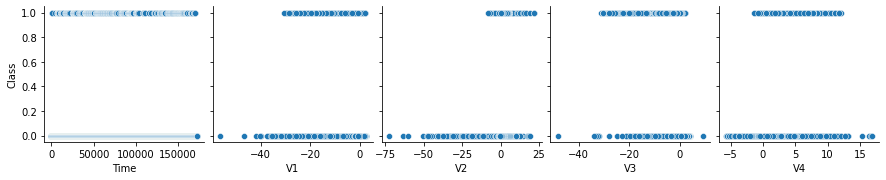

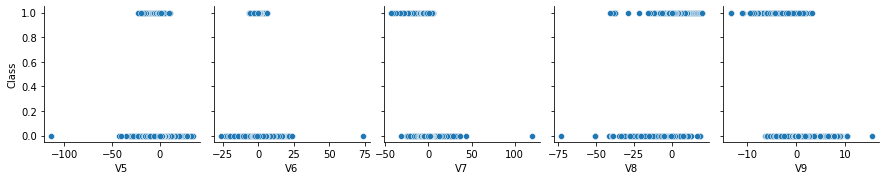

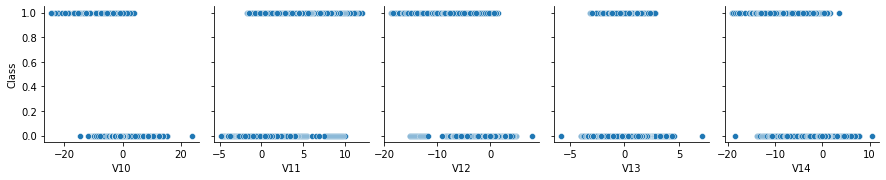

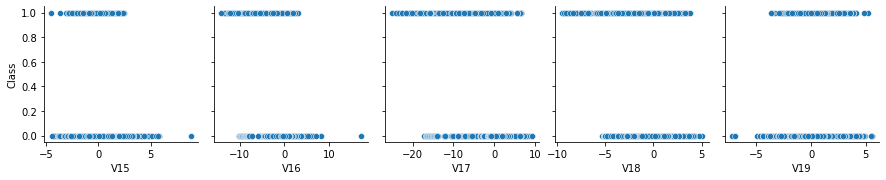

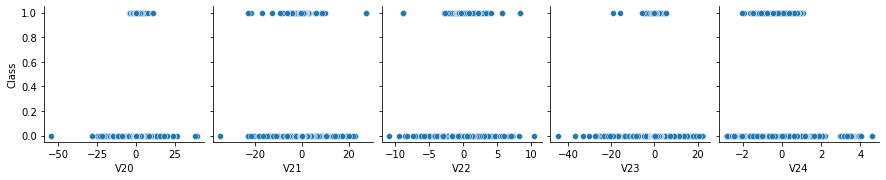

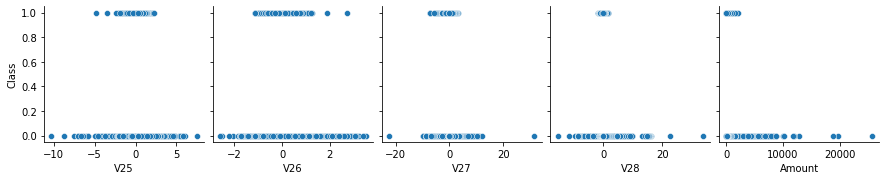

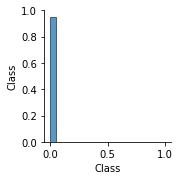

In [37]:
#checking the relationship between the features and the target variable
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Class'])

In [53]:
# correlation maatrix

corr = data.corr()
round(corr,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
V1,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.0,0.0,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.0,-0.00,0.00,-0.10,-0.23
V2,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.0,0.0,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.0,-0.00,-0.00,0.09,-0.53
V3,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.0,0.0,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.0,0.00,0.00,-0.19,-0.21
V4,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.0,-0.00,0.00,0.13,0.10
V5,0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.0,0.0,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.0,0.00,0.00,-0.09,-0.39
V6,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.0,-0.0,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.0,0.00,0.00,-0.04,0.22
V7,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.0,0.0,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.0,0.00,-0.00,-0.19,0.40
V8,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.0,0.0,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.0,0.00,-0.00,0.02,-0.10
V9,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.0,-0.0,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.0,-0.00,0.00,-0.10,-0.04
V10,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.0,0.0,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.0,-0.00,0.00,-0.22,-0.10


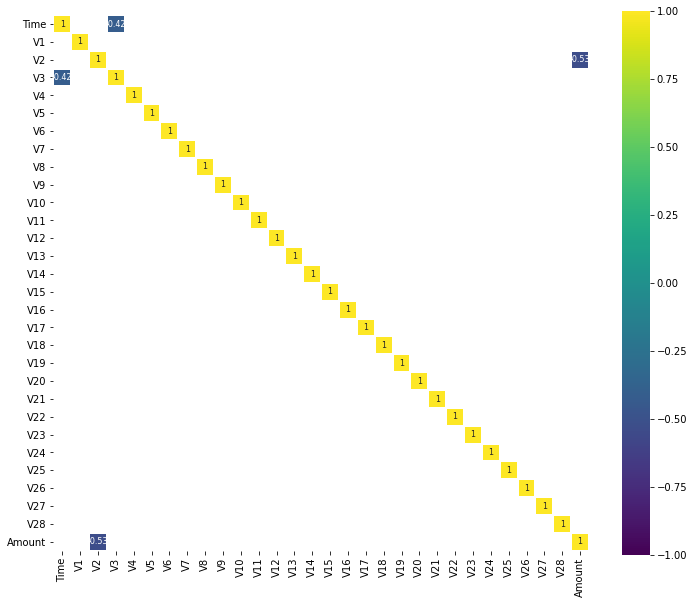

In [38]:
#Feature to feature correlation relationship
corr = df_num.drop('Class', axis=1).corr() # We already examined class correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [39]:
 data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [63]:
#scaling the amount and the time column since they dont fall in the range of V1 and V2

In [40]:
#scaling the amount and the time column since they dont fall in the range of V1 and V2
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))#reshapes all the values in the data set
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount','scaled_time'], axis=1, inplace=True)

In [41]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680


In [83]:
da=data.iloc[4]
da

V1              -1.158233
V2               0.877737
V3               1.548718
V4               0.403034
V5              -0.407193
V6               0.095921
V7               0.592941
V8              -0.270533
V9               0.817739
V10              0.753074
V11             -0.822843
V12              0.538196
V13              1.345852
V14             -1.119670
V15              0.175121
V16             -0.451449
V17             -0.237033
V18             -0.038195
V19              0.803487
V20              0.408542
V21             -0.009431
V22              0.798278
V23             -0.137458
V24              0.141267
V25             -0.206010
V26              0.502292
V27              0.219422
V28              0.215153
Class            0.000000
scaled_amount    0.670579
Name: 4, dtype: float64

In [42]:
#splitting the data using StratifiedKFold ,this Generate test sets such that all contain the same distribution of classes


from sklearn.model_selection import StratifiedKFold
X = data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)


print('The Distributions of target variable for the ytrain and ytest: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
The Distributions of target variable for the ytrain and ytest: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [43]:
train_index

array([     0,      1,      2, ..., 227866, 227867, 227868])

In [44]:
test_index

array([212516, 212644, 213092, ..., 284804, 284805, 284806])

In [45]:
X.iloc[test_index]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
212516,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,-2.515356,-4.501315,2.093075,-5.418889,-1.247014,-3.828268,0.399050,-6.366500,-7.550968,-4.902767,0.152892,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,-0.307273
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,9.863900
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,0.006567
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,-0.191434
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,1.376930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


In [46]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


In [92]:
#now we have to undersample the dataset to have an equal target variable of class

In [47]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
175498,2.236435,-0.769980,-1.752324,-1.050262,-0.262015,-1.009342,-0.286571,-0.248458,-0.394600,0.906348,-1.138801,-1.707985,-1.716428,0.515056,0.514950,1.059836,0.179081,-1.399704,0.803907,-0.098207,0.010034,-0.181608,0.224198,0.418424,-0.076512,-0.326635,-0.068613,-0.059988,0,0.066373
223578,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,-4.614508,2.710697,-3.158156,1.083609,-3.415152,-1.053870,-3.751031,-9.261641,-2.955165,0.606571,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,1,-0.183050
112728,-0.824663,-0.133017,2.781831,-1.176036,-1.358261,-0.213095,-0.134471,0.148357,-0.950320,-0.150567,-0.928368,-0.705497,0.046610,-0.439606,0.922567,-0.467576,-0.626230,1.919494,-1.852796,-0.303074,-0.048094,0.115225,-0.059280,0.370968,0.108868,0.492906,0.024191,0.082105,0,0.903933
112840,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,0.334533,0.826375,0.196887,-1.885993,-0.472026,-0.578141,-1.243007,0.570460,-0.159057,0.407188,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,1,0.321805
248971,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,-1.849927,-3.443819,2.214000,-1.689836,0.498438,-4.393634,-1.270841,-1.176629,-1.859739,-0.049419,0.385263,0.126518,0.364130,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,1,-0.296793


In [48]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
193299,1.606439,-0.479591,-2.670842,0.658211,0.733327,-0.335041,0.496772,-0.165751,0.620736,-0.969246,0.448793,0.602031,0.070626,-1.823056,-0.764459,0.492606,0.985704,1.172704,0.474634,0.316947,-0.044393,-0.354529,-0.274312,-1.307790,0.206276,-0.265679,-0.027343,0.009131,0,2.967372
188762,-1.487990,0.955713,-3.444045,-2.481079,0.764266,-0.273814,-0.072794,1.229270,-1.480714,0.638520,0.134640,-0.055411,-0.782491,1.466402,-1.453043,0.131715,0.968461,-2.149655,-0.713848,-0.409682,0.777494,2.357118,0.193819,-1.564638,-0.976003,-0.001195,0.342119,0.222570,0,-0.055893
226457,2.080797,-1.789127,-0.817772,-1.733877,-1.232102,0.124497,-1.291883,-0.011011,-1.268798,1.620007,-0.043909,0.024800,1.275803,-0.567736,-0.620985,0.228273,-0.274346,0.596138,0.492078,-0.126760,-0.345719,-0.762301,0.224064,-1.084374,-0.522643,-0.453840,0.016562,-0.034731,0,1.419688
114727,-1.229410,1.010865,0.731288,-0.549591,0.261692,-0.754916,1.183231,0.048538,-0.584234,-0.510105,-0.249768,0.222716,0.070783,0.392877,0.371844,-0.069962,-0.183038,-1.244444,-0.813439,-0.061761,-0.301793,-0.822941,0.006345,0.073968,-0.309300,-0.037103,-0.060931,-0.196704,0,0.809753
161299,-1.161218,-0.377202,1.331132,-0.774213,1.074726,1.530867,0.277109,0.309489,0.145762,-0.390316,0.780417,0.215648,-0.408364,-0.062458,0.767728,-0.054496,-0.464816,-0.324288,-0.982118,-0.212292,0.254559,1.058970,-0.345467,-1.579898,-0.342305,0.459564,-0.007729,-0.193010,0,1.509118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82678,1.277862,-1.218097,0.436517,-1.443919,-0.943716,0.816429,-1.234908,0.338397,-1.845883,1.249644,0.727192,-0.541243,0.093744,-0.108782,1.664313,-1.748267,1.848211,-2.056222,-1.922357,-0.460539,-0.066430,0.302245,0.191320,-0.666031,0.013571,-0.098652,0.096963,0.011778,0,0.111786
26394,1.097986,-0.165431,-0.627863,0.202711,0.365279,-0.131542,0.425670,-0.098684,-0.307819,0.070603,0.228796,0.317302,-0.210797,0.707352,0.218608,0.648138,-0.958647,0.125196,0.865115,0.174201,-0.350608,-1.373402,-0.132951,-1.009930,0.375355,0.191655,-0.095345,0.006265,0,1.493747
167476,1.795829,-0.761346,-0.604386,0.055982,-0.648471,-0.267232,-0.472046,0.097486,1.157085,-0.056395,0.543033,0.624518,-0.878355,0.386929,0.146968,0.470325,-0.741318,0.293290,0.387726,-0.068980,-0.158643,-0.603934,0.291831,-0.449405,-0.578966,-0.325729,-0.020188,-0.036746,0,1.089220
109142,1.237674,-0.579219,0.783164,0.206540,-1.183894,-0.325809,-0.626070,0.042567,-0.442275,0.568795,-0.486848,0.012491,-0.515955,-0.077381,0.016843,-2.042859,0.691312,0.153353,-1.021443,-0.580353,-0.610668,-1.158261,0.224262,0.367493,0.080931,0.192235,0.020074,0.022990,0,0.003074


In [2]:
pip install dataprep

  Using cached dataprep-0.3.0-py3-none-any.whl (1.8 MB)
  Using cached usaddress-0.5.10-py2.py3-none-any.whl (63 kB)
  Using cached regex-2020.11.13-cp38-cp38-win32.whl (254 kB)
  Using cached aiohttp-3.7.4.post0-cp38-cp38-win32.whl (610 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Using cached wordcloud-1.8.1-cp38-cp38-win32.whl (145 kB)
  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Using cached bokeh-2.3.3.tar.gz (10.7 MB)
  Using cached Bottleneck-1.3.2.tar.gz (88 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached Metaphone-0.6.tar.gz (14 kB)
  Using cached dask-2.30.0-py3-none-any.whl (848 kB)
  Using cached jsonpath_

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\user\appdata\local\programs\python\python38-32\python.exe' 'c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\USER\AppData\Local\Temp\tmpt3ik_mfu'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-hsbpyin3\bottleneck_f68daa2d30e94371944ebdfbd878304a
  Complete output (51 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win32-3.8
  creating build\lib.win32-3.8\bottleneck
  copying bottleneck\_pytesttester.py -> build\lib.win32-3.8\bottleneck
  copying bottleneck\_version.py -> build\lib.win32-3.8\bottleneck
  copying bottleneck\__init__.py -> build\lib.win32-3.8\bottleneck
  creating build\lib.win32-3.8\bottleneck\benchmark
  copying bottleneck\benchmark\autotimeit.py -> build\lib.win32-3.8\bottleneck\benchmark
  copying bottleneck\benchmark\bench.py -> build\lib.win

Using legacy 'setup.py install' for bokeh, since package 'wheel' is not installed.
Using legacy 'setup.py install' for metaphone, since package 'wheel' is not installed.
Using legacy 'setup.py install' for python-Levenshtein, since package 'wheel' is not installed.
Failed to build bottleneck


In [1]:
#visualizing using data prep library
from dataprep.eda import create_report
create_report(data)

ModuleNotFoundError: No module named 'dataprep'